### Importing necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier  # for K nearest neighbours
from sklearn.ensemble import RandomForestClassifier

from sklearn import svm  #for Support Vector Machine (SVM) Algorithm
from sklearn.metrics import accuracy_score, confusion_matrix #for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier #for using Decision Tree Algoithm

import warnings
warnings.filterwarnings("ignore")

### Loading data

In [2]:
data = pd.read_csv('dataset/titanic.csv') #  Loading the dataset fron its path

### Analysing the data

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [4]:
data.shape # print the shape of the data(No. of rows and columns)

(891, 12)

**We can see that the data has 891 rows and 12 columns/features. And also from the information we can see that some of the features has "Nan" values in them. We need to process those Nan before training the model.**

In [5]:
data.head(2) # Lets see the sample of data with 2 records

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [6]:
data.describe() # lets check the distribution of columns in data

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [7]:
# find categorical values
for col in data.columns:
     if (data[col].nunique() < 10):
        print(f"{col}: {data[col].unique()}")

Survived: [0 1]
Pclass: [3 1 2]
Sex: ['male' 'female']
SibSp: [1 0 3 4 2 5 8]
Parch: [0 1 2 5 3 4 6]
Embarked: ['S' 'C' 'Q' nan]


We can see the different values present in some of the features of the dataset

### Distribution of features

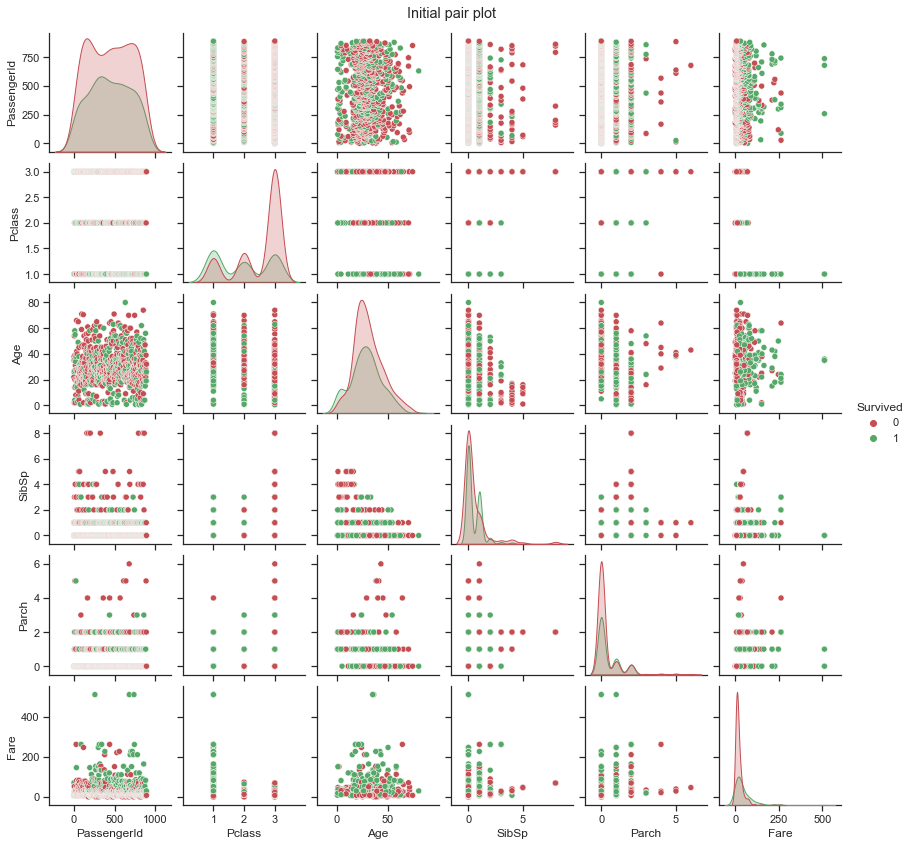

In [8]:
sns.set_theme(style="ticks")
survival_pal = {0: "r", 1:"g"}
screening_df = data.copy()

g = sns.pairplot(screening_df, hue="Survived", palette = survival_pal,height=2, aspect=1)
g.fig.subplots_adjust(top=0.95)
g.fig.suptitle('Initial pair plot');

**We can see the pair plot of the features in the dataset**

### Lets see the correlation

In [9]:
corr = screening_df.corr(); corr

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
PassengerId,1.000000,-0.005007,-0.035144,0.036847,-0.057527,-0.001652,0.012658
Survived,-0.005007,1.000000,-0.338481,-0.077221,-0.035322,0.081629,0.257307
Pclass,-0.035144,-0.338481,1.000000,-0.369226,0.083081,0.018443,-0.549500
Age,0.036847,-0.077221,-0.369226,1.000000,-0.308247,-0.189119,0.096067
SibSp,-0.057527,-0.035322,0.083081,-0.308247,1.000000,0.414838,0.159651
Parch,-0.001652,0.081629,0.018443,-0.189119,0.414838,1.000000,0.216225
Fare,0.012658,0.257307,-0.549500,0.096067,0.159651,0.216225,1.000000


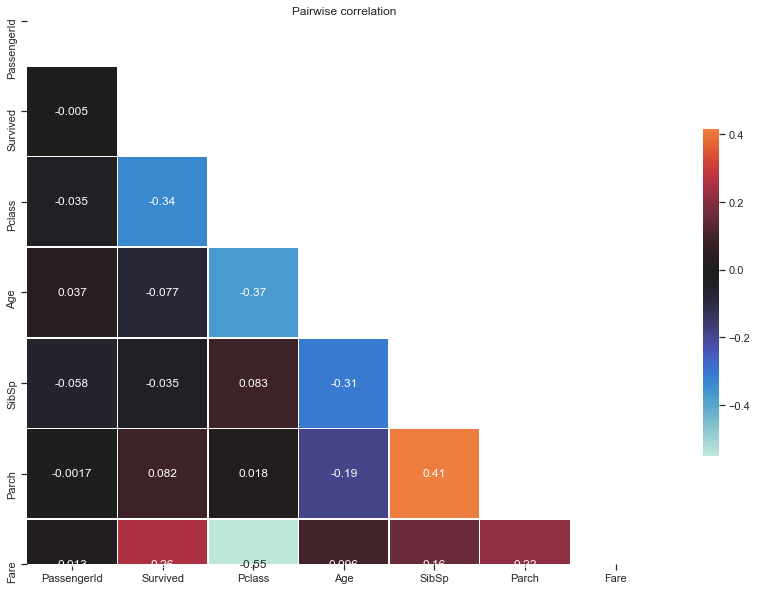

In [10]:
mask = np.triu(np.ones_like(corr, dtype=bool))
f, ax = plt.subplots(figsize=(15, 10))
g = sns.heatmap(corr, mask=mask, cmap="icefire", center=0, square=True, linewidths=.5, annot=True,
            cbar_kws={"shrink": 0.6}).set_title('Pairwise correlation')

### Lets fill the nan values in the dataset

In [11]:
data.isna().sum().sort_index()

Age            177
Cabin          687
Embarked         2
Fare             0
Name             0
Parch            0
PassengerId      0
Pclass           0
Sex              0
SibSp            0
Survived         0
Ticket           0
dtype: int64

- **We can see the nan values in "Age", "Cabin" and "Embarked".**
- **Before filling the nan values we need analyse the features and fill with appropriate value which best fits the data and helps the model to understand the feature better.**

In [12]:
# Lets cehck the values of the age
data['Age'].describe()

count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

- **We can see the distribution of the Age feature in the dataset.**
- **It is better to fill the nan values in the Age feature with mean.**

In [13]:
data['Age'].fillna(data['Age'].mean(),inplace=True)

In [14]:
# Lets check the "Cabin" feature 
data['Cabin'].value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
D              3
F33            3
              ..
B4             1
C111           1
B94            1
E49            1
C99            1
Name: Cabin, Length: 147, dtype: int64

- **We can see that Cabin feature is categorical with large scope of value.**
- **And also major values in the Cabin feature are Nan.**
- **We have 80% of the Cabin values Nan which is bad for the dataset.**
- **So we will remove this feature from the data.**

In [15]:
data.drop(['Cabin'], axis=1, inplace=True)

In [16]:
# Lets analyse the Embarked feature in the dataset
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

- **We have three categories in teh Embarked feature.**
- **Most of the values in the Embarked feature is class 'S'.**
- **We have only two nan values in the Embarked feature of the dataset.**
- **So, It is better to replace Nan's with calss 'S'.**

In [17]:
data['Embarked'].fillna('S', inplace=True)

In [18]:
data.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

- **Now we can see that there are no Nan values in the dataset.**

In [19]:
data['Name'].value_counts()

Risien, Mr. Samuel Beard                               1
Slayter, Miss. Hilda Mary                              1
Caldwell, Mrs. Albert Francis (Sylvia Mae Harbaugh)    1
Staneff, Mr. Ivan                                      1
Sadlier, Mr. Matthew                                   1
                                                      ..
Widener, Mr. Harry Elkins                              1
Andersson, Miss. Erna Alexandra                        1
Laroche, Miss. Simonne Marie Anne Andree               1
Hassan, Mr. Houssein G N                               1
Danoff, Mr. Yoto                                       1
Name: Name, Length: 891, dtype: int64

- **We can the Name feature in the dataset is having different for every record.**
- **Model will not get any information from the feature.**
- **So, We will drop this feature from teh dataset.**

In [20]:
data.drop(['Name'], axis=1, inplace=True)

In [21]:
data['PassengerId'].value_counts()

891    1
293    1
304    1
303    1
302    1
      ..
591    1
590    1
589    1
588    1
1      1
Name: PassengerId, Length: 891, dtype: int64

- **Even the PassengerId feature in the dataset is having different for every record.**
- **Model will not get any information from the feature.**
- **So, We will drop this feature from the dataset.**

In [22]:
data.drop(['PassengerId'], axis=1, inplace=True)

### Lets view some more plots to better understand the dataset

Text(0.5, 1.0, 'Embarked')

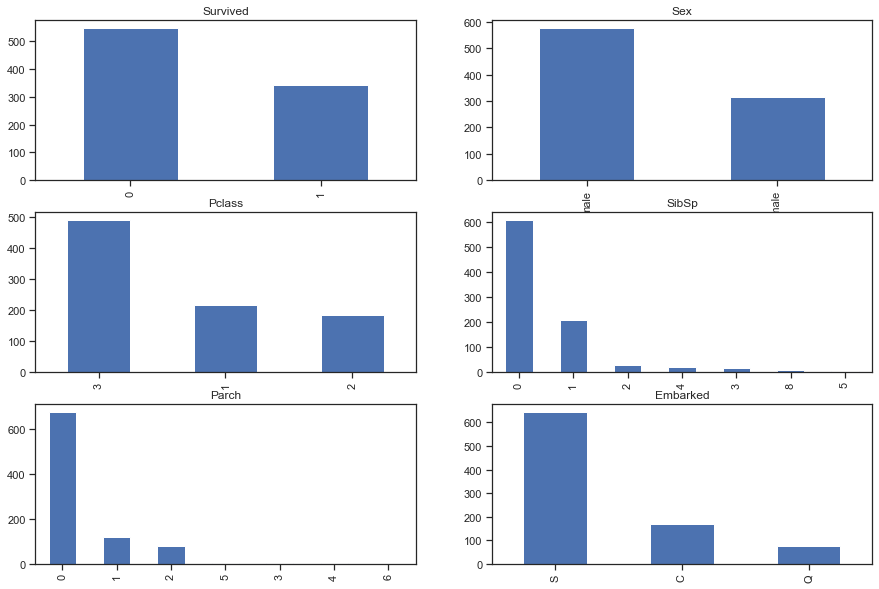

In [23]:
fig, axes = plt.subplots(3, 2, figsize=(15, 10))

data['Survived'].value_counts().plot(ax=axes[0, 0], kind='bar')
axes[0, 0].set_title("Survived")
data['Sex'].value_counts().plot(ax=axes[0, 1], kind='bar')
axes[0, 1].set_title("Sex")
data['Pclass'].value_counts().plot(ax=axes[1, 0], kind='bar')
axes[1, 0].set_title("Pclass")
data['SibSp'].value_counts().plot(ax=axes[1, 1], kind='bar')
axes[1, 1].set_title("SibSp")
data['Parch'].value_counts().plot(ax=axes[2, 0], kind='bar')
axes[2, 0].set_title("Parch")
data['Embarked'].value_counts().plot(ax=axes[2, 1], kind='bar')
axes[2,1].set_title("Embarked")

- **We can see and understand the distribution of the features in the dataset.**

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    object 
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    object 
dtypes: float64(2), int64(4), object(3)
memory usage: 62.8+ KB


- **We can observe som of the object types in the dataset.**
- **We need to Label Encode this into integer values.**

In [25]:
# Label Encoding the categorical features into int
for feature in ["Sex", "Ticket", "Embarked"]:
    le = LabelEncoder() 
    data[feature] = le.fit_transform(list(data[feature].values))

In [26]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Ticket    891 non-null    int64  
 7   Fare      891 non-null    float64
 8   Embarked  891 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 62.8 KB


- **Now we can see that all the values in the dataset is converted into either int (or) float.**
- **Now the data is better to train the model.**

### Splitting The Data into Train And Test Datasets

In [27]:
# Splitting the dataset into train and test set with 80% in train and 20% in test to validate the model
train, test = train_test_split(data, test_size = 0.2, shuffle=True, random_state=42, stratify=data["Survived"])

print(f'Shape of train dataset : {train.shape}') # getting train data shape
print(f'Shape of train dataset : {test.shape}') # getting test data shape

Shape of train dataset : (712, 9)
Shape of train dataset : (179, 9)


In [28]:
train["Survived"].value_counts()

0    439
1    273
Name: Survived, dtype: int64

In [29]:
test["Survived"].value_counts()

0    110
1     69
Name: Survived, dtype: int64

In [30]:
target = "Survived"
features = list(data.columns)
features = [i for i in features if i!=target]

In [31]:
train_X = train[features]# taking the training data features
train_y=train[target]# output of our training data
test_X= test[features] # taking test data features
test_y =test[target]   #output value of test data

In [32]:
model = svm.SVC() #select the algorithm
model.fit(train_X,train_y) # we train the algorithm with the training data and the training output
prediction=model.predict(test_X) #now we pass the testing data to the trained algorithm
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the SVM is : {accuracy*100}%')#now we check the accuracy of the algorithm. 
#we pass the predicted output by the model and the actual output

The accuracy of the SVM is : 63.128491620111724%


In [33]:
model=DecisionTreeClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Decision Tree is : {accuracy*100}%')

The accuracy of the Decision Tree is : 75.41899441340783%


In [34]:
model=KNeighborsClassifier(n_neighbors=4) #this examines 3 neighbours for putting the new data into a class
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the KNN is : {accuracy*100}%')

The accuracy of the KNN is : 70.39106145251397%


In [35]:
model = RandomForestClassifier(n_estimators=10, random_state=12)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
accuracy = accuracy_score(prediction,test_y)
print(f'The accuracy of the Random Forest Classifier is : {accuracy*100}%')

The accuracy of the Random Forest Classifier is : 82.68156424581005%


### OBSERVATIONS

   - **We trained different models using the data.**
   - **Random Forest Classifier performed better compared to the other model.**
   - **Even more accuracy can be obtained by fine-tuning the parameters.**
   - **Extra features can be created using the data present which helps the model to better perform.**
   